In [1]:

# ARTIFICIAL NEURAL NETWORK.


import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

# Load dataset
dataset = pd.read_csv(r'/Users/gowthammarrapu/Documents/untitled folder 2/Deep Learning A-Z/Part 1 - Artificial Neural Networks (ANN)/Churn_Modelling.csv')

# Prepare features and target
X = dataset.iloc[:, 3:-1].values  # Features
y = dataset.iloc[:, -1].values      # Target

# Encode categorical data
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])  # Encoding the 'Geography' column

# One-hot encoding for the categorical feature
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)  # Corrected this line to scale X_test instead of y_test

# Build the ANN
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))  # Output layer for binary classification

# Compile the ANN
ann.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN
ann.fit(X_train, y_train, batch_size=32, epochs=100)

# Make predictions
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary output

# Print predictions and actual values
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 526us/step - accuracy: 0.7878 - loss: 0.5709
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.7954 - loss: 0.4700
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.7957 - loss: 0.4458
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.7981 - loss: 0.4312
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.8006 - loss: 0.4255
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.7956 - loss: 0.4314
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.7952 - loss: 0.4355
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.8051 - loss: 0.4335
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.8061 - loss: 0.4395
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.8242 - loss: 0.4076
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.8250 - loss: 0.4177
Epoch 12/100
250/25

In [2]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
# CONVOLUTIONAL NEURAL NETWORK.

In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image

# Data Augmentation for Training Set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Load training data
training_set = train_datagen.flow_from_directory(
    r'/Users/gowthammarrapu/Documents/untitled folder 2/Deep Learning A-Z/Part 2 - Convolutional Neural Networks (CNN)/dataset/training_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'  # Use 'categorical' for multi-class classification
)

# Load test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    r'/Users/gowthammarrapu/Documents/untitled folder 2/Deep Learning A-Z/Part 2 - Convolutional Neural Networks (CNN)/dataset/test_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

# Building the CNN
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compiling the CNN
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the CNN to the Training Set
cnn.fit(x=training_set, validation_data=test_set, epochs=25)


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.5223 - loss: 0.6974 - val_accuracy: 0.6575 - val_loss: 0.6337
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.6457 - loss: 0.6309 - val_accuracy: 0.6990 - val_loss: 0.5857
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 97ms/step - accuracy: 0.7068 - loss: 0.5662 - val_accuracy: 0.7295 - val_loss: 0.5442
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.7400 - loss: 0.5257 - val_accuracy: 0.7515 - val_loss: 0.5061
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.7572 - loss: 0.4995 - val_accuracy: 0.7665 - val_loss: 0.4864
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.7783 - loss: 0.4764 - val_accuracy: 0.7690 - val_loss: 0.4895
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 110ms/step - accuracy: 0.7793 - loss: 0.4556 - val_accuracy: 0.7675 - val_loss: 0.4876
Epoch

In [31]:
# Making a single prediction
test_image = image.load_img(
    r'/Users/gowthammarrapu/Documents/untitled folder 2/black-cat-yellow-eyes-8341385.jpg.webp',
    target_size=(64, 64)
)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Predicting the class
result = cnn.predict(test_image)
training_set.class_indices  # Get the class indices for reference

# Making the prediction based on the result
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

print(f'The prediction is: {prediction}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
The prediction is: cat


In [32]:
# RECURRENT NEURAL NETWORK.

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.1301
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0058
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0069
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0049
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0056
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0050
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0046
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0045
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0051
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0040
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0042
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0045
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0044
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0040
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - lo

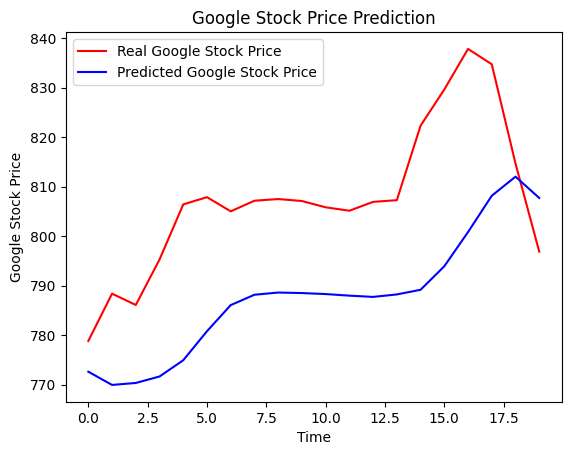

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Load and preprocess the training data
dataset_train = pd.read_csv(r'/Users/gowthammarrapu/Documents/untitled folder 2/Deep Learning A-Z/Part 3 - Recurrent Neural Networks (RNN)/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# Scale the data
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Prepare the training data
X_train, y_train = [], []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

# Compile and fit the model
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

# Load and preprocess the test data
dataset_test = pd.read_csv(r'/Users/gowthammarrapu/Documents/untitled folder 2/Deep Learning A-Z/Part 3 - Recurrent Neural Networks (RNN)/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values.reshape(-1, 1)
inputs = sc.transform(inputs)

# Prepare the test data
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Plot the results
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
